<a href="https://colab.research.google.com/github/daianeuk/deep_learning_ocean_samsung/blob/main/Ocean_DeepLearning_24_11_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # Fluxo para construção da rede neural:
- Organizar camada de entrada (input)
- Organizar camada de saída (output)
- Estruturar a nossa rede neural
- Treinar o modelo
- Fazer as previsões


In [3]:
import keras
from keras.datasets import mnist
from tensorflow.python.keras import Sequential
from tensorflow.python.keras.layers import Dense, Dropout
from tensorflow.compat.v1.keras.optimizers import RMSprop


In [4]:
#Carregando dados de treino e teste

(x_treino, y_treino), (x_teste, y_teste) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [20]:
print("Quantidade de imagens para treino: ", len(x_treino))
print("Quantidade de imagens para teste: ", len(x_teste))
print("Tipo de x_treino: ", type(x_treino))

primeira_imagem = x_treino[0]
#print("Matriz da primeira imagem: ", primeira_imagem)
representacao_primeira_imagem = y_treino[0]
#print("O que representa a primeira imagem: ", representacao_primeira_imagem)

Quantidade de imagens para treino:  60000
Quantidade de imagens para teste:  10000
Tipo de x_treino:  <class 'numpy.ndarray'>
Matriz da primeira imagem:  [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0  

Este imagem representa 0


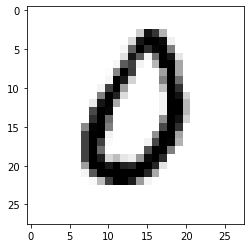

In [22]:
import matplotlib.pyplot as plt

indice = 666

print("Este imagem representa", y_treino[indice])

plt.imshow(x_treino[indice], cmap=plt.cm.binary)

plt.show()

In [23]:
# achatando a matriz de treino e transformando em uma unica lista

quantidade_treino = len(x_treino)
quantidade_teste = len(x_teste)

resolucao_imagem  = x_treino[0].shape
resolucao_total = resolucao_imagem[0] * resolucao_imagem[1]

x_treino = x_treino.reshape(quantidade_treino, resolucao_total)
x_teste = x_teste.reshape(quantidade_teste, resolucao_total)

In [28]:
#como ficou x_treino
print("Quantidade de itens em x_treino: ", len(x_treino[0]))
print(x_treino[0])


Quantidade de itens em x_treino:  784
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 

In [29]:
# Normalização dos dados:

# 255 vira 1
# 127 vira 0.5
# 0 vira 0
# E assim por diante

# Precisamos garantir que o valor máximo de entrada é 1
# Como atualmente a imagem fornece um valor máximo de 255, precisamos normalizá-los

x_treino = x_treino.astype('float32')
x_teste = x_teste.astype('float32')

x_treino /= 255
x_teste /= 255

print(x_treino[0][350], type(x_treino[0][350]))

0.27450982 <class 'numpy.float32'>


In [31]:
# Visualizar a matriz normalizada:

print("Dados normalizados: ", x_treino[1]) 

Dados normalizados:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0

In [33]:
# Preparar a camada de saída:

valores_unicos = set(y_treino)  # {0,1,2,3,4,5,6,7,8,9}
print(valores_unicos)

quant_valores_unicos = len(valores_unicos) # 10
print(quant_valores_unicos)

# Transformar valores únicos em variáveis categóricas: 

# Numero 0 => [1,0,0,0,0,0,0,0,0,0]

# Numero 1 => [0,1,0,0,0,0,0,0,0,0]

print("y_treino[0] antes: ", y_treino[0])
y_treino = keras.utils.to_categorical(y_treino, quant_valores_unicos)
y_teste = keras.utils.to_categorical(y_teste, quant_valores_unicos)
print("y_treino[0] depois: ", y_treino[0])


{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
10
y_treino[0] antes:  5
y_treino[0] depois:  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [35]:
# Criando modelo da rede neural:

model = Sequential()

# Primeira hidden layer
# 30 neurônios
# Função de ativação: ReLU
# Como estamos na primeira hidden layer, precisamos informar o formato da camada de entrada (input)

model.add(Dense(30, activation='relu',input_shape=(resolucao_total,)))

# adicionamos um regularizador que ajuda a evitar o Overfitting
# No caso será o Dropout

model.add(Dropout(0.2))

# Segunda Hidden Layer
# 20 neurônios 
# Função de ativação ReLU

model.add(Dense(20, activation='relu'))

# Mais um regularizador depois da segunda hidden layer
model.add(Dropout(0.2))

# Finalizamos com a camada de saída (output), informando a quantidade de valores únicos, que no caso é 10
model.add(Dense(quant_valores_unicos, activation='softmax'))

# Exibe o resumo do modelo criado
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 30)                23550     
_________________________________________________________________
dropout_2 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 20)                620       
_________________________________________________________________
dropout_3 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                210       
Total params: 24,380
Trainable params: 24,380
Non-trainable params: 0
_________________________________________________________________


In [36]:
# Compila o modelo:

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

In [37]:
# Treina o modelo:

history = model.fit(x_treino,y_treino,
                    batch_size=128,
                    epochs=10,
                    verbose=1,
                    validation_data=(x_teste,y_teste))

Epoch 1/10
469/469 [==============================] - 1s 3ms/step - loss: 0.8387 - accuracy: 0.7352 - val_loss: 0.3053 - val_accuracy: 0.9140
Epoch 2/10
469/469 [==============================] - 1s 2ms/step - loss: 0.4644 - accuracy: 0.8622 - val_loss: 0.2406 - val_accuracy: 0.9299
Epoch 3/10
469/469 [==============================] - 1s 2ms/step - loss: 0.3898 - accuracy: 0.8856 - val_loss: 0.2110 - val_accuracy: 0.9393
Epoch 4/10
469/469 [==============================] - 1s 2ms/step - loss: 0.3498 - accuracy: 0.8973 - val_loss: 0.1942 - val_accuracy: 0.9450
Epoch 5/10
469/469 [==============================] - 1s 2ms/step - loss: 0.3244 - accuracy: 0.9057 - val_loss: 0.1798 - val_accuracy: 0.9500
Epoch 6/10
469/469 [==============================] - 1s 2ms/step - loss: 0.3073 - accuracy: 0.9109 - val_loss: 0.1720 - val_accuracy: 0.9513
Epoch 7/10
469/469 [==============================] - 1s 2ms/step - loss: 0.2984 - accuracy: 0.9126 - val_loss: 0.1647 - val_accuracy: 0.9544
Epoch 

Qual é o valor categorico em y_teste[indice]:  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
Previsão:  [[2.9891211e-08 6.5742235e-05 9.9799097e-01 1.3817418e-03 1.0909158e-09
  3.9745901e-05 2.6574931e-05 2.4212436e-04 2.5319951e-04 1.0492496e-09]]
Previsão ajustada: [2]


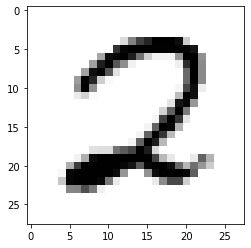

In [39]:
# Fazendo nossas previsoes:

indice = 35

print('Qual é o valor categorico em y_teste[indice]: ', y_teste[indice])

#Preparar a imagem para fazer a predição:

imagem = x_teste[indice].reshape((1,resolucao_total))

prediction = model.predict(imagem)
print("Previsão: ", prediction)

import numpy as np
prediction_class = np.argmax(model.predict(imagem), axis=-1)
print("Previsão ajustada:", prediction_class)

# Apenas para visualizar a imagem
(x_treino_img, y_treino_img), (x_teste_img, y_teste_img) = mnist.load_data()
plt.imshow(x_teste_img[indice], cmap=plt.cm.binary)


